In [1]:
from model import FFNet, tv_model, ResBam
from learning import Learn, Selector, Metrics
from dataset import SKDS, TVDS, CDataset, ImageDatasetStats, AsTensor, Squeeze, DType

from torch.optim import Adam
from torch.nn import MSELoss, CrossEntropyLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms


In [2]:
import numpy as np

class DummyDataset(CDataset):
    def load_data(self, boom='bust'):
        """datadic with keys X, target, embeds (with or without 'features')"""
        datadic = {1: {'X': {'all': np.asarray([.01,.02]),
                             'feature_a': np.asarray([.01]),
                             'feature_b': np.asarray([.02])},
                       'embeds': {'feature_c': 'a',
                                  'feature_d': 'b'},
                       'targets': {'feature_e': np.asarray([.3]),
                                   'feature_f': np.asarray([.4])}},
                   2: {'X': {'all': np.asarray([.03,.04]),
                             'feature_a': np.asarray([.03]),
                             'feature_b': np.asarray([.04])},
                       'embeds': {'feature_c': 'c',
                                  'feature_d': 'd'},
                       'targets': {'feature_e': np.asarray([.7]),
                                   'feature_f': np.asarray([.8])}}}
        print(boom)
        return datadic
    
class DummyTransform():
    def __call__(self, arr):
        return np.add(arr, 10)
    
class DummyTransformTwo():
    def __call__(self, arr):
        return np.add(arr, 100)
    
ds_params = {'train_params': {'features': ['all'],
                              'embeds': ['feature_c'],
                              'targets': ['feature_f'],
                              'embed_lookup': {'a': 1, 'b': 2, 'c': 3, 'd': 4},
                              'transform': [DummyTransform(), DummyTransformTwo()],
                              'target_transform': [],
                              'boom': 'bang'}}
    
d = DummyDataset(**ds_params['train_params'])
d[2]

bang
CDataset created...


(array([110.03, 110.04]), array([3]), array([0.8]))

In [3]:
ds_params = {'train_params': {'make': 'make_regression',
                              'sk_params': {'n_samples': 100,
                                            'n_features': 5},
                              'features_dtype': 'float32',
                              'targets_dtype': 'float32'}}

sk = SKDS(**ds_params['train_params'])

sk[1]

CDataset created...
SKDS make_regression created...


(array([-0.53070426, -0.18220289,  0.8861682 , -1.1892292 ,  0.9295645 ],
       dtype=float32),
 [],
 array([5.6691875], dtype=float32))

In [4]:
ds_params = {'train_params': {'make': 'make_classification',
                              'features_dtype': 'float32',
                              'targets_dtype': 'int64',
                              'sk_params': {'n_samples': 100,
                                            'n_features': 10,
                                            'n_informative': 8,
                                            'n_clusters_per_class': 2,
                                            'flip_y': 0.05,
                                            'class_sep': 0.01,
                                            'n_classes': 4}}}

sk = SKDS(**ds_params['train_params'])

sk[1]

CDataset created...
SKDS make_classification created...


(array([-0.3080999 ,  0.2691049 ,  0.07615314,  0.05485181,  0.01213287,
         0.42936113,  0.17620766, -1.1314062 , -1.0785538 ,  1.0824673 ],
       dtype=float32),
 [],
 array([0]))

In [5]:
ds_params={'dataset': 'MNIST',
           'tv_params': {'root': './data/',
                         'train': True,
                         'download': True,
                         'transform': transforms.Compose([
                                           transforms.Resize(224)]),
                         'target_transform': None}}

tvds = TVDS(**ds_params)
tvds[1]

CDataset created...
TVDS created...


(<PIL.Image.Image image mode=L size=224x224 at 0x7F9A71B1BFD0>, [], 0)

In [ ]:
ds_params={'dataset': 'MNIST',
           'tv_params': {'root': './data/',
                         'train': True,
                         'download': True,
                         'transform': transforms.Compose([
                                           transforms.Resize(224)]),
                         'target_transform': None}}

tvds = TVDS(**ds_params)
ids = ImageDatasetStats(tvds)

print('mean: ', ids.stats.mean)
print('stddev: ', ids.stats.stddev)

#mean: 33.3/255 = .13
#stddev: 73.7/255 = .29

CDataset created...
SKDS make_regression created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:02.545054
epoch: 0, lr: 0.01
train loss: 654255.2754629629, val loss: 593643.4125
sklearn train metric: 0, sklearn validation metric: 0
test loss: 13147.4515625
learning time: 0:00:06.950847
sklearn test metric: 
0 



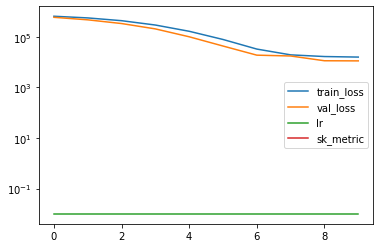

In [6]:
model_params = {'D_in': 256, 
                'H': 512, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': []}

ds_params = {'train_params': {'features_dtype': 'float32',
                              'targets_dtype': 'float32',
                              'make': 'make_regression',
                              'sk_params': {'n_samples': 10000,
                                            'n_features': 256,
                                            'n_informative': 200}}}
             
metrics_params = {'report_interval': 10}                         
             
opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 2}

l = Learn([SKDS], 
          FFNet,
          Metrics=Metrics,
          Sampler=Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=MSELoss,
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=256, epochs=10)

CDataset created...
SKDS make_classification created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:00.742048
epoch: 0, lr: 0.01
train loss: 1.4252034138750147, val loss: 1.3983836607499556
sklearn train metric: 0.500314202246277, sklearn validation metric: 0.512295257476099
test loss: 1.0665015090595593
learning time: 0:00:07.492849
sklearn test metric: 
0.8886658949338404 



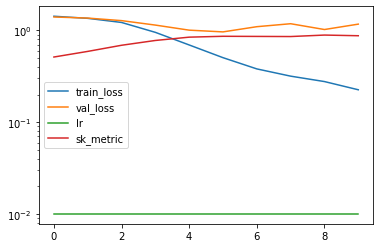

In [7]:
model_params = {'D_in': 256, 
                'H': 192, 
                'D_out': 4, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'features_dtype': 'float32',
                              'targets_dtype': 'int64',
                              'make': 'make_classification',
                              'sk_params': {'n_samples': 10000,
                                            'n_features': 256,
                                            'n_informative': 200,
                                            'n_clusters_per_class': 3,
                                            'flip_y': 0.05,
                                            'class_sep': 0.1,
                                            'n_classes': 4}}}
                                     
metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 5}

l = Learn([SKDS], 
          FFNet, 
          Sampler=Selector,
          Metrics=Metrics,
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss,
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=128, epochs=10, squeeze_y=True)

Files already downloaded and verified
CDataset created...
TVDS created...
Files already downloaded and verified
CDataset created...
TVDS created...
TorchVision model resnet18 loaded...
learning time: 0:00:12.507833
epoch: 0, lr: 0.01
train loss: 2.3286157760620116, val loss: 2.0690879591049685
sklearn train metric: 0.638693533640781, sklearn validation metric: 0.7246175418719709
learning time: 0:00:24.663107
epoch: 1, lr: 0.01
train loss: 2.0118989610671996, val loss: 1.9283819775427542
sklearn train metric: 0.7265260713938327, sklearn validation metric: 0.7770264670092613
test loss: 1.9276102174758911
learning time: 0:00:33.206083
sklearn test metric: 
0.7748739888888889 



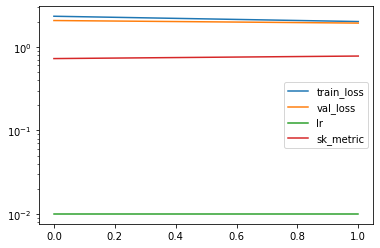

In [8]:
model_params = {'model_name': 'resnet18',
                'in_channels': 3,
                'tv_params': {'num_classes': 10}}

ds_params={'train_params': {'dataset': 'CIFAR10',
                            'tv_params': {'root': './data/',
                                          'train': True,
                                          'download': True,
                                          'transform': transforms.Compose([
                                                           transforms.RandomRotation(10),
                                                           transforms.Resize(224),
                                                           transforms.ToTensor()]),
                                          'target_transform': None,
                                          'download': True}},
           'test_params': {'dataset': 'CIFAR10',
                           'tv_params': {'root': './data/',
                                         'train': False,
                                         'download': True,
                                         'transform': transforms.Compose([
                                                         transforms.Resize(224),
                                                         transforms.ToTensor()]),
                                         'target_transform': None,
                                         'download': True}}}

metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.8,),
                 'subset': .1}

sched_params = {'factor': .5,
                'patience': 1,
                'cooldown': 1}

l = Learn([TVDS,TVDS], 
          tv_model, 
          Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=16, epochs=2)

CDataset created...
TVDS created...
CDataset created...
TVDS created...
CModel loaded...
ResBam model loaded...
learning time: 0:00:27.226767
epoch: 0, lr: 0.005
train loss: 1.967618275642395, val loss: 1.8854137043799124
sklearn train metric: 0.748631094899846, sklearn validation metric: 0.7749442653980817
learning time: 0:00:52.524266
epoch: 1, lr: 0.005
train loss: 1.8035283231735229, val loss: 1.7266805018148115
sklearn train metric: 0.7969415620550606, sklearn validation metric: 0.820183159595216
test loss: 1.727625229801887
learning time: 0:01:09.136853
sklearn test metric: 
0.8184396324619388 



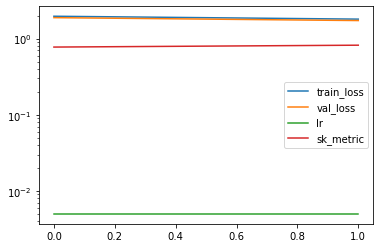

In [2]:
model_params = {'n_classes': 10,
                'residual': True,
                'in_channels': 3,
                'groups': 4,
                'bam': True,
                'dropout': [.1,.2,.3,.2,.1],
                #'act': None
               }


ds_params={'train_params': {'dataset': 'CIFAR10',
                            'tv_params': {'root': './data/',
                                          'train': True,
                                          'transform': transforms.Compose([
                                                       transforms.RandomRotation(10),
                                                       transforms.Resize(256),
                                                       transforms.ToTensor(),
                                                       transforms.Normalize(.13,.29)]),
                                          'target_transform': None}},
           'test_params': {'dataset': 'CIFAR10',
                           'tv_params': {'root': './data/',
                                         'train': False,
                                         'transform': transforms.Compose([
                                                      transforms.Resize(256),
                                                      transforms.ToTensor(),
                                                      transforms.Normalize(.13,.29)]),
                                         'target_transform': None}}}

metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.005}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.8,),
                 'subset': .1}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 1}

l = Learn([TVDS,TVDS], 
          ResBam, 
          Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=32, epochs=2)

CDataset created...
TVDS created...
CDataset created...
TVDS created...
TorchVision model resnext50_32x4d loaded...
learning time: 0:01:01.245593
epoch: 0, lr: 0.01
train loss: 2.6004126033782957, val loss: 2.1135673388358085
sklearn train metric: 0.6190488622358277, sklearn validation metric: 0.6796909457099649
learning time: 0:02:02.606963
epoch: 1, lr: 0.01
train loss: 2.075892207145691, val loss: 2.0253423933059937
sklearn train metric: 0.6949258229770175, sklearn validation metric: 0.7473325163815032
test loss: 2.04041131439209
learning time: 0:02:45.389339
sklearn test metric: 
0.7389379111111112 



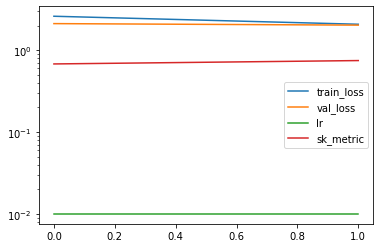

In [10]:
model_params = {'model_name': 'resnext50_32x4d',
                'in_channels': 3,
                'tv_params': {'num_classes': 10}}

ds_params={'train_params': {'dataset': 'CIFAR10',
                            'tv_params': {'root': './data/',
                                          'train': True,
                                          'transform': transforms.Compose([
                                                       transforms.RandomRotation(10),
                                                       transforms.Resize(256),
                                                       transforms.ToTensor()]),
                                          'target_transform': None}},
           'test_params': {'dataset': 'CIFAR10',
                           'tv_params': {'root': './data/',
                                         'train': False,
                                         'transform': transforms.Compose([
                                                      transforms.Resize(256),
                                                      transforms.ToTensor()]),
                                         'target_transform': None}}}

metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.8,),
                 'subset': .1}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 2}

l = Learn([TVDS,TVDS], 
          tv_model, 
          Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=16, epochs=2)